In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('GlobalTempClean.csv')

In [3]:
df.head()

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
1,5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
2,6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
3,7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
4,8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744


In [4]:
df.shape

(8235082, 9)

In [5]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [6]:
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')

In [7]:
df[df['Country']=='India'].shape

(960548, 7)

In [11]:
df[df['City']=='Delhi'].nunique()

AverageTemperature               2271
AverageTemperatureUncertainty    1235
City                                1
Country                             1
Latitude                            1
Longitude                           1
Year                              201
dtype: int64

In [13]:
df = df[df['City']=='Delhi']
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
dt,,,,,,,
1796-01-01,14.590,2.374,Delhi,India,28.13N,77.27E,1796
1796-02-01,17.109,1.940,Delhi,India,28.13N,77.27E,1796
1796-03-01,21.454,2.608,Delhi,India,28.13N,77.27E,1796
1796-04-01,28.715,2.122,Delhi,India,28.13N,77.27E,1796
1796-05-01,33.726,1.997,Delhi,India,28.13N,77.27E,1796


In [14]:
df.shape

(2394, 7)

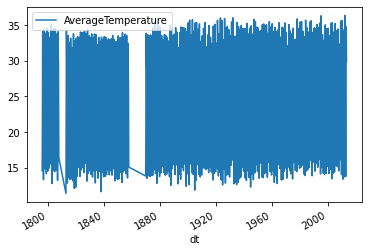

In [15]:
import matplotlib.pyplot as plt

df[['AverageTemperature']].plot() 
plt.show()

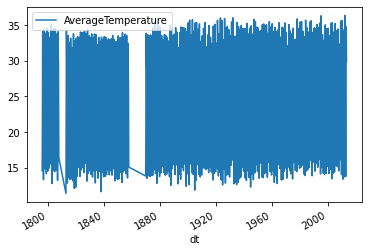

In [16]:
data_inter = df.interpolate()
data_inter[['AverageTemperature']].plot()
plt.show()

In [17]:
data = data_inter['AverageTemperature'].values
print(data.shape)

from sklearn.preprocessing import MinMaxScaler

data = data.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
print(scaled_data)
scaled_data_series = scaled_data.reshape(1,-1)
print(scaled_data_series)

(2394,)
[[0.12868074]
 [0.22959817]
 [0.40366972]
 ...
 [0.86887545]
 [0.78822964]
 [0.74203758]]
[[0.12868074 0.22959817 0.40366972 ... 0.86887545 0.78822964 0.74203758]]


In [18]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [19]:
raw_seq = scaled_data_series[0]
n_steps = 12

# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [20]:
print(X.shape)
print(X[1])

(2382, 12)
[0.22959817 0.40366972 0.69456352 0.89531669 0.91687032 0.79896639
 0.76611514 0.71010777 0.58943953 0.35254998 0.07744081 0.42402147]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape

(1905, 12)

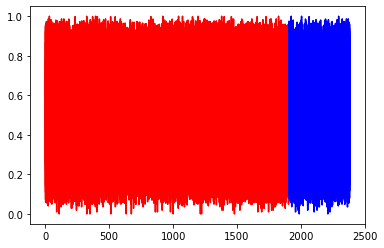

In [23]:
y1 = np.arange(1,X_train.shape[0]+1)
y2 = np.arange(X_train.shape[0],X_train.shape[0]+X_test.shape[0])

plt.plot(y1, X_train, 'r', y2, X_test, 'b')
plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import layers
import keras

In [25]:
n_features = 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], n_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], n_features)

In [26]:
X_train.shape

(1905, 12, 1)

In [27]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=2)

Epoch 1/200
191/191 - 0s - loss: 0.0035
Epoch 2/200
191/191 - 1s - loss: 0.0038
Epoch 3/200
191/191 - 1s - loss: 0.0036
Epoch 4/200
191/191 - 1s - loss: 0.0033
Epoch 5/200
191/191 - 1s - loss: 0.0033
Epoch 6/200
191/191 - 1s - loss: 0.0035
Epoch 7/200
191/191 - 1s - loss: 0.0036
Epoch 8/200
191/191 - 1s - loss: 0.0033
Epoch 9/200
191/191 - 1s - loss: 0.0035
Epoch 10/200
191/191 - 1s - loss: 0.0031
Epoch 11/200
191/191 - 1s - loss: 0.0031
Epoch 12/200
191/191 - 1s - loss: 0.0031
Epoch 13/200
191/191 - 1s - loss: 0.0031
Epoch 14/200
191/191 - 1s - loss: 0.0032
Epoch 15/200
191/191 - 1s - loss: 0.0029
Epoch 16/200
191/191 - 1s - loss: 0.0030
Epoch 17/200
191/191 - 1s - loss: 0.0029
Epoch 18/200
191/191 - 1s - loss: 0.0030
Epoch 19/200
191/191 - 1s - loss: 0.0028
Epoch 20/200
191/191 - 1s - loss: 0.0031
Epoch 21/200
191/191 - 1s - loss: 0.0030
Epoch 22/200
191/191 - 1s - loss: 0.0028
Epoch 23/200
191/191 - 1s - loss: 0.0029
Epoch 24/200
191/191 - 1s - loss: 0.0030
Epoch 25/200
191/191 - 1s

Epoch 199/200
191/191 - 1s - loss: 0.0020
Epoch 200/200
191/191 - 1s - loss: 0.0019


In [34]:
loss = model.evaluate(X_train, y_train, verbose=0)
print(loss)

0.002142112236469984


In [35]:
predictions = model.predict(X_test, verbose=2)
predictions = predictions.reshape(predictions.shape[0])
print(predictions.shape, y_test.shape)

15/15 - 0s
(477,) (477,)


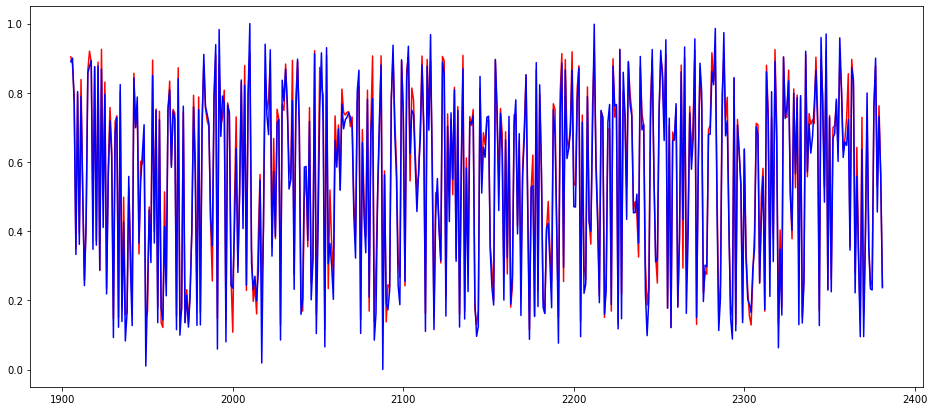

In [36]:
fig = plt.figure(figsize=(16, 7))
plt.plot(y2, predictions, 'r', y2, y_test, 'b')
plt.show()